In [70]:
from keras import layers
from keras import models
import tensorflow as tf
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
import keras.backend as K
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
import gc
from keras_preprocessing.image import ImageDataGenerator
import os
import pickle as plk
import pandas as pd
import numpy as np

In [27]:
#check GPU enabled
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

True

In [53]:
train_dir = 'E:\\CS224S_final_Project\\data\\melspectrograms\\train\\'
dev_dir = 'E:\\CS224S_final_Project\\data\\melspectrograms\\dev\\'

In [79]:
example = np.load("E:\\CS224S_final_Project\\data\\melspectrograms\\train\\303_0.npy", allow_pickle=True)
input_dim = example[0].shape
print("input dim:", input_dim)

train_index_to_file = {}
idx = 0
for file in os.listdir(train_dir):
    train_index_to_file[idx] = file
    idx += 1
    
dev_index_to_file = {}
idx = 0
for file in os.listdir(dev_dir):
    dev_index_to_file[idx] = file
    idx += 1
    
train_idx = train_index_to_file.keys()
dev_idx = dev_index_to_file.keys()

input dim: (128, 646)


In [ ]:
class MelSpectDataGen(Sequence):
    """
    Generates a dataset of log melspectrograms
    """
    def __init__(self, idx, mel_path, idx_to_file,
                 to_fit=True, batch_size=32, dim=(128, 646),
                 n_classes=2, shuffle=True):
        self.idx = idx
        self.mel_path = mel_path
        self.idx_to_file = idx_to_file
        self.to_fit = to_fit
        self.batch_size = batch_size
        self.dim = dim
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()
        
    def __len__(self):
        """
        numbers of batches per epoch
        """
        return int(np.floor(len(self.idx) / self.batch_size))
    
    def __getitem__(self, index):
        """
        returns one batch of data
        """
        ids = self.idx[index * self.batch_size : (index + 1) * self.batch_size]
        
        

In [14]:
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizers.RMSprop(lr=0.0005, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

ModuleNotFoundError: No module named 'pandas'

In [13]:
#Fitting keras model, no test gen for now
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
#STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=30)
model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID)

NameError: name 'model' is not defined

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_directory(
    directory="test",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode=None,
    target_size=(64,64))
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

In [13]:
history.history

{'loss': [0.5970097184181213,
  0.5864580869674683,
  0.5733625292778015,
  0.5593507289886475,
  0.5499074459075928,
  0.529107928276062,
  0.5039184093475342,
  0.49000266194343567,
  0.4611984193325043,
  0.4361407458782196,
  0.4101009964942932,
  0.3861428201198578,
  0.3670750558376312,
  0.3522728979587555,
  0.3325035870075226,
  0.3121224343776703,
  0.2907268702983856,
  0.2930213212966919,
  0.2721068859100342,
  0.2542506158351898,
  0.2511141002178192,
  0.2314685732126236,
  0.22735288739204407,
  0.22089965641498566,
  0.20902900397777557,
  0.1775413602590561,
  0.18083719909191132,
  0.1746797114610672,
  0.17320701479911804,
  0.15977928042411804],
 'accuracy': [0.7194675803184509,
  0.7171381115913391,
  0.7174708843231201,
  0.720798671245575,
  0.728723406791687,
  0.7400998473167419,
  0.7527454495429993,
  0.7650582194328308,
  0.7763727307319641,
  0.7946755290031433,
  0.8053244352340698,
  0.8282861709594727,
  0.8296173214912415,
  0.841930091381073,
  0.8552

In [14]:
output = model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID)

In [21]:
history.history['val_accuracy']

[0.5980902910232544,
 0.5980902910232544,
 0.5972222089767456,
 0.5963541865348816,
 0.5642361044883728,
 0.5078125,
 0.484375,
 0.5295138955116272,
 0.5251736044883728,
 0.4869791567325592,
 0.5130208134651184,
 0.484375,
 0.5199652910232544,
 0.5138888955116272,
 0.4756944477558136,
 0.4600694477558136,
 0.5269097089767456,
 0.4904513955116272,
 0.5182291865348816,
 0.4131944477558136,
 0.5199652910232544,
 0.4756944477558136,
 0.4600694477558136,
 0.4921875,
 0.4505208432674408,
 0.5355902910232544,
 0.5486111044883728,
 0.5234375,
 0.4635416567325592,
 0.4609375]

In [18]:
output

[1.459011435508728, 0.4618055522441864]

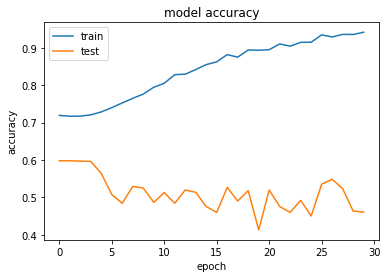

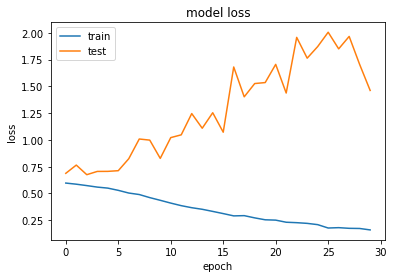

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
history.history

{'loss': [0.5970097184181213,
  0.5864580869674683,
  0.5733625292778015,
  0.5593507289886475,
  0.5499074459075928,
  0.529107928276062,
  0.5039184093475342,
  0.49000266194343567,
  0.4611984193325043,
  0.4361407458782196,
  0.4101009964942932,
  0.3861428201198578,
  0.3670750558376312,
  0.3522728979587555,
  0.3325035870075226,
  0.3121224343776703,
  0.2907268702983856,
  0.2930213212966919,
  0.2721068859100342,
  0.2542506158351898,
  0.2511141002178192,
  0.2314685732126236,
  0.22735288739204407,
  0.22089965641498566,
  0.20902900397777557,
  0.1775413602590561,
  0.18083719909191132,
  0.1746797114610672,
  0.17320701479911804,
  0.15977928042411804],
 'accuracy': [0.7194675803184509,
  0.7171381115913391,
  0.7174708843231201,
  0.720798671245575,
  0.728723406791687,
  0.7400998473167419,
  0.7527454495429993,
  0.7650582194328308,
  0.7763727307319641,
  0.7946755290031433,
  0.8053244352340698,
  0.8282861709594727,
  0.8296173214912415,
  0.841930091381073,
  0.8552